## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import sklearn
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df.dropna(inplace=True) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [7]:
df['City'] = df.address.str.split(',', expand = True)[1]
df['Street'] = df.address.str.split(',', expand = True)[0]
df['State_Zip'] = df.address.str.split(',', expand = True)[2]
df['State_Zip'] = df['State_Zip'].str.strip()
df['Country'] = df.address.str.split(',', expand = True)[3]
df['State'] = df.State_Zip.str.split(' ', expand = True)[0]
df['Zip'] = df.State_Zip.str.split(' ', expand = True)[1]
df = df.drop(columns=['State_Zip', 'address'])

In [8]:
state_hawaii = df[df['State'].str.contains('Hawaii')]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [10]:
df_alaska = df[df['State'].str.contains('Alaska')]
#df_alaska = df_alaska[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']]
#df_compare_alaska = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [12]:
df['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [13]:
df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [14]:
df['heat_source'] = df['heat_source'].fillna("None")
df['heat_elec'] = df['heat_source'].str.contains('Electricity').astype(int)
df['heat_solar'] = df['heat_source'].str.contains('Solar').astype(int)
df['heat_gas'] = df['heat_source'].str.contains('Gas').astype(int)
df['heat_oil'] = df['heat_source'].str.contains('Oil').astype(int)
df['heat_other'] = df['heat_source'].str.contains('Other').astype(int)
df['heat_none'] = df['heat_source'].str.contains('None').astype(int)

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,Street,Country,State,Zip,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,2102 Southeast 21st Court,United States,Washington,98055,0,0,1,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,11231 Greenwood Avenue North,United States,Washington,98133,0,0,0,1,0,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,8504 South 113th Street,United States,Washington,98178,0,0,1,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,4079 Letitia Avenue South,United States,Washington,98118,0,0,1,0,0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,2193 Northwest Talus Drive,United States,Washington,98027,1,0,0,0,0,0


In [16]:
df = pd.get_dummies(df, columns=['waterfront', 'greenbelt', 'nuisance'], drop_first=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30111 non-null  int64  
 1   date            30111 non-null  object 
 2   price           30111 non-null  float64
 3   bedrooms        30111 non-null  int64  
 4   bathrooms       30111 non-null  float64
 5   sqft_living     30111 non-null  int64  
 6   sqft_lot        30111 non-null  int64  
 7   floors          30111 non-null  float64
 8   view            30111 non-null  object 
 9   condition       30111 non-null  object 
 10  grade           30111 non-null  object 
 11  heat_source     30111 non-null  object 
 12  sewer_system    30111 non-null  object 
 13  sqft_above      30111 non-null  int64  
 14  sqft_basement   30111 non-null  int64  
 15  sqft_garage     30111 non-null  int64  
 16  sqft_patio      30111 non-null  int64  
 17  yr_built        30111 non-null 

In [18]:
df['grade'] = df['grade'].str[:2].astype(np.int64)

In [19]:
df['grade'].value_counts()

7     11693
8      9400
9      3804
6      2852
10     1369
11      406
5       385
12      122
4        46
13       24
3         9
2         1
Name: grade, dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True) 

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,Zip,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none,waterfront_YES,greenbelt_YES,nuisance_YES
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,98055,0,0,1,0,0,0,0,0,0
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,98133,0,0,0,1,0,0,0,0,1
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,98178,0,0,1,0,0,0,0,0,0
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,98118,0,0,1,0,0,0,0,0,0
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,98027,1,0,0,0,0,0,0,0,1


In [22]:
X = df["yr_built"].values.reshape(-1,1)
y = df["grade"].values

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9108.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:18:12   Log-Likelihood:                -42811.
No. Observations:               30111   AIC:                         8.563e+04
Df Residuals:                   30109   BIC:                         8.564e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.3358      0.356    -73.936      0.0

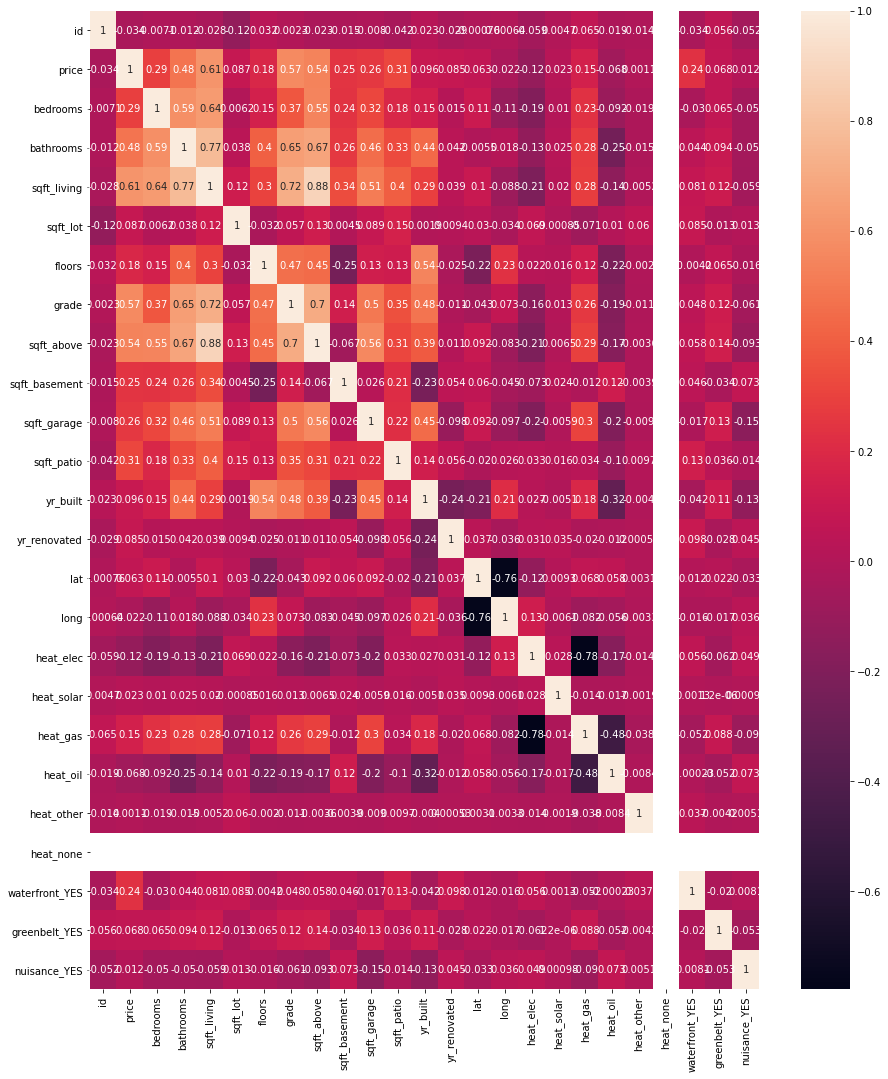

In [23]:
fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(df.corr(), annot=True);

In [24]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,...,long,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none,waterfront_YES,greenbelt_YES,nuisance_YES
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,0.002279,-0.023340,-0.015077,...,0.000638,-0.059286,0.004722,0.065264,-0.018674,-0.013582,NaN,-0.034483,0.056029,-0.051652
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.566534,0.538631,0.245005,...,-0.022278,-0.116747,0.022783,0.146982,-0.068227,0.001120,NaN,0.235074,0.067936,0.012186
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.371866,0.546221,0.237957,...,-0.106791,-0.193221,0.010496,0.231047,-0.091914,-0.018820,NaN,-0.029699,0.065298,-0.049978
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.647044,0.674239,0.260684,...,0.017684,-0.129447,0.025065,0.276511,-0.252717,-0.014822,NaN,0.043985,0.093870,-0.049927
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.721615,0.883733,0.338387,...,-0.087625,-0.210128,0.020117,0.277851,-0.143080,-0.005215,NaN,0.081276,0.116015,-0.059094
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.057102,0.131756,0.004457,...,-0.034408,0.069203,-0.000853,-0.071225,0.010166,0.059848,NaN,0.084860,-0.012706,0.012666
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.465100,0.448245,-0.248466,...,0.233589,0.022068,0.016469,0.121445,-0.221519,-0.001975,NaN,-0.004181,0.065286,-0.016244
grade,0.002279,0.566534,0.371866,0.647044,0.721615,0.057102,0.465100,1.000000,0.702825,0.138007,...,0.072950,-0.156850,0.012521,0.258922,-0.187135,-0.011352,NaN,0.047586,0.120089,-0.060785
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,0.702825,1.000000,-0.067306,...,-0.082722,-0.210449,0.006497,0.294378,-0.168751,-0.003596,NaN,0.058461,0.135389,-0.093457
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,0.138007,-0.067306,1.000000,...,-0.045104,-0.072680,0.023891,-0.011977,0.120586,-0.003918,NaN,0.045715,-0.033851,0.072740


In [25]:
#df = pd.DataFrame({'A': [1,2,3,4,5], 'B': [5,4,3,2,1], 'C': [1,1,1,1,1], 'D': [2,2,2,2,2]})
corr_matrix = df.corr()
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_matrix = corr_matrix.where(abs(corr_matrix) >= 0.5)
print(corr_matrix)


                id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id             NaN    NaN       NaN        NaN          NaN       NaN     NaN   
price          NaN    NaN       NaN        NaN     0.608616       NaN     NaN   
bedrooms       NaN    NaN       NaN   0.588035     0.637048       NaN     NaN   
bathrooms      NaN    NaN       NaN        NaN     0.772226       NaN     NaN   
sqft_living    NaN    NaN       NaN        NaN          NaN       NaN     NaN   
sqft_lot       NaN    NaN       NaN        NaN          NaN       NaN     NaN   
floors         NaN    NaN       NaN        NaN          NaN       NaN     NaN   
grade          NaN    NaN       NaN        NaN          NaN       NaN     NaN   
sqft_above     NaN    NaN       NaN        NaN          NaN       NaN     NaN   
sqft_basement  NaN    NaN       NaN        NaN          NaN       NaN     NaN   
sqft_garage    NaN    NaN       NaN        NaN          NaN       NaN     NaN   
sqft_patio     NaN    NaN   

In [26]:
X = df["sqft_living"].values
y = df["sqft_above"].values

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:18:14   Log-Likelihood:            -2.2393e+05
No. Observations:               30111   AIC:                         4.479e+05
Df Residuals:                   30109   BIC:                         4.479e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.4168      5.658     22.342      0.0

In [27]:
df['yr_built'].value_counts()

2021    1700
1968     514
2020     504
1978     493
1977     484
        ... 
1901      39
1934      38
1935      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [28]:
df_yr_built = df.sort_values(by='yr_built', ascending=False)

In [29]:
df_yr_built

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,Zip,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none,waterfront_YES,greenbelt_YES,nuisance_YES
2081,1447710300,2022-05-16,1313807.0,4,2.5,2780,7650,2.0,NONE,Average,...,98045,0,0,1,0,0,0,0,0,0
21429,8556550260,2022-04-29,1199950.0,5,3.5,3060,8384,2.0,NONE,Average,...,98010,0,0,1,0,0,0,0,1,0
25172,2297300200,2022-03-07,729950.0,4,2.5,2400,3763,2.0,NONE,Average,...,98042,0,0,1,0,0,0,0,1,0
2108,2767601085,2021-07-12,1050000.0,3,3.0,1670,2524,3.0,NONE,Average,...,98107,1,0,0,0,0,0,0,0,0
12734,7126300052,2021-06-21,259900.0,3,2.5,2880,4541,2.0,AVERAGE,Average,...,98056,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25698,9523103535,2021-10-26,1000000.0,3,1.5,1460,6000,1.5,NONE,Average,...,98103,0,0,0,1,0,0,0,0,0
29471,5458300160,2021-06-16,1075000.0,2,2.0,1420,1591,1.0,NONE,Very Good,...,98109,0,0,1,0,0,0,0,0,1
5732,1102000495,2021-10-22,535000.0,2,1.0,950,6235,1.0,NONE,Average,...,98118,0,0,1,0,0,0,0,0,0
927,7128300065,2022-02-17,925700.0,2,1.5,1240,3000,2.0,AVERAGE,Good,...,98144,0,0,0,1,0,0,0,0,1


In [30]:
df['decade_built'] = pd.cut(df['yr_built'], bins=[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030], right=False)

df['decade_built'] = (df['yr_built'] // 10) * 10

df.head()
                                    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none,waterfront_YES,greenbelt_YES,nuisance_YES,decade_built
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,0,0,1,0,0,0,0,0,0,1960
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,0,0,0,1,0,0,0,0,1,1950
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,0,0,1,0,0,0,0,0,0,1950
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,0,0,1,0,0,0,0,0,0,2010
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,1,0,0,0,0,0,0,0,1,2010


In [31]:
df['decade_built'].describe()

count    30111.000000
mean      1970.670187
std         32.386980
min       1900.000000
25%       1950.000000
50%       1970.000000
75%       2000.000000
max       2020.000000
Name: decade_built, dtype: float64

In [32]:
model = sm.OLS(endog = df['grade'], exog = df['decade_built']).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  grade   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.488e+06
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:18:14   Log-Likelihood:                         -45321.
No. Observations:               30111   AIC:                                  9.064e+04
Df Residuals:                   30110   BIC:                                  9.065e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
decade_built     0.0039   3.19e-06   1219.717      0.000       0.004       0.004
==============================================================================
Omnibus:                     3400.570   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6318.216
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                       4.667   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

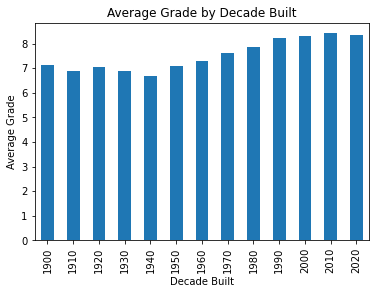

In [33]:
df.groupby('decade_built')['grade'].mean().plot(kind='bar')

plt.title("Average Grade by Decade Built")
plt.xlabel("Decade Built")
plt.ylabel("Average Grade")

plt.show()

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,heat_elec,heat_solar,heat_gas,heat_oil,heat_other,heat_none,waterfront_YES,greenbelt_YES,nuisance_YES,decade_built
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,0,0,1,0,0,0,0,0,0,1960
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,0,0,0,1,0,0,0,0,1,1950
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,0,0,1,0,0,0,0,0,0,1950
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,0,0,1,0,0,0,0,0,0,2010
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,1,0,0,0,0,0,0,0,1,2010


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              30111 non-null  int64         
 1   date            30111 non-null  datetime64[ns]
 2   price           30111 non-null  float64       
 3   bedrooms        30111 non-null  int64         
 4   bathrooms       30111 non-null  float64       
 5   sqft_living     30111 non-null  int64         
 6   sqft_lot        30111 non-null  int64         
 7   floors          30111 non-null  float64       
 8   view            30111 non-null  object        
 9   condition       30111 non-null  object        
 10  grade           30111 non-null  int64         
 11  heat_source     30111 non-null  object        
 12  sewer_system    30111 non-null  object        
 13  sqft_above      30111 non-null  int64         
 14  sqft_basement   30111 non-null  int64         
 15  sq

In [36]:
df = df[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "grade", "decade_built"]]


In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,decade_built
0,675000.0,4,1.0,1180,7140,1.0,7,1960
1,920000.0,5,2.5,2770,6703,1.0,7,1950
2,311000.0,6,2.0,2880,6156,1.0,7,1950
3,775000.0,3,3.0,2160,1400,2.0,9,2010
4,592500.0,2,2.0,1120,758,2.0,7,2010


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30111 non-null  float64
 1   bedrooms      30111 non-null  int64  
 2   bathrooms     30111 non-null  float64
 3   sqft_living   30111 non-null  int64  
 4   sqft_lot      30111 non-null  int64  
 5   floors        30111 non-null  float64
 6   grade         30111 non-null  int64  
 7   decade_built  30111 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.1 MB


In [39]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,decade_built
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.566534,0.093844
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.371866,0.141948
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.647044,0.439100
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.721615,0.287822
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.057102,0.000085
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.465100,0.548377
grade,0.566534,0.371866,0.647044,0.721615,0.057102,0.465100,1.000000,0.477805
decade_built,0.093844,0.141948,0.439100,0.287822,0.000085,0.548377,0.477805,1.000000


In [40]:
X = df.drop("price", axis=1)
y = df["price"]

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     3492.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:18:14   Log-Likelihood:            -4.4649e+05
No. Observations:               30111   AIC:                         8.930e+05
Df Residuals:                   30103   BIC:                         8.931e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.011e+07   2.89e+05     34.949      0.000    9.54e+06    1.07e+07
bedrooms     -1.345e+05   5341.315    -25.179      0.000   -1.45e+05   -1.24e+05
bathrooms     1.077e+05   7591.043     14.190      0.000    9.28e+04    1.23e+05
sqft_living    399.3871      7.939     50.307      0.000     383.826     414.948
sqft_lot         0.1484      0.065      2.278      0.023       0.021       0.276
floors       -2.732e+04   8484.432     -3.220      0.001   -4.39e+04   -1.07e+04
grade         2.734e+05   5512.125     49.601      0.000    2.63e+05    2.84e+05
decade_built -5931.2308    153.751    -38.577      0.000   -6232.589   -5629.872
==============================================================================
Omnibus:                    45031.783   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58100457.358
Skew:                           8.797   Prob(JB):                         0.00
Kurtosis:                     217.475   Cond. No.                     4.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
sqft_grade = df[['sqft_living','grade']]
sqft_grade.head()

,sqft_living,grade
0,1180,7
1,2770,7
2,2880,7
3,2160,9
4,1120,7


In [42]:
sqft_grade.loc[:, 'sqft_living'] = np.log(sqft_grade['sqft_living'])
sqft_grade.loc[:, 'grade'] = np.log(sqft_grade['grade'])
sqft_grade.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,sqft_living,grade
0,7.073270,1.945910
1,7.926603,1.945910
2,7.965546,1.945910
3,7.677864,2.197225
4,7.021084,1.945910


In [43]:
sample_1 = sqft_grade.sample(100).corr()
sample_1

,sqft_living,grade
sqft_living,1.000000,0.709023
grade,0.709023,1.000000


[2.38399353 2.67337188]


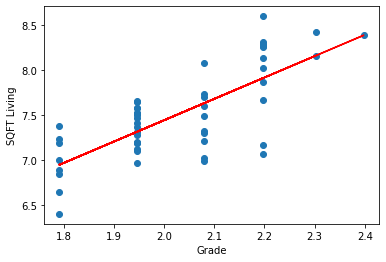

In [45]:
reg_1 = np.polyfit(sample_1['grade'],sample_1['sqft_living'], deg=1)
print(reg_1)

trend_1 = np.polyval(reg_1,sample_1['grade'])
plt.scatter(sample_1['grade'], sample_1['sqft_living'])
plt.xlabel("Grade")
plt.ylabel("SQFT Living")
plt.plot(sample_1['grade'], trend_1, 'r');

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,decade_built
0,675000.0,4,1.0,1180,7140,1.0,7,1960
1,920000.0,5,2.5,2770,6703,1.0,7,1950
2,311000.0,6,2.0,2880,6156,1.0,7,1950
3,775000.0,3,3.0,2160,1400,2.0,9,2010
4,592500.0,2,2.0,1120,758,2.0,7,2010


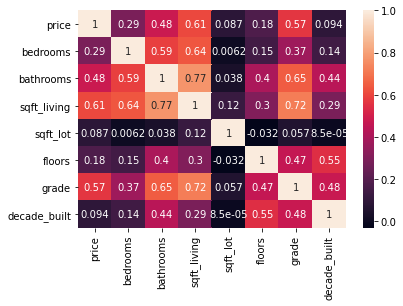

In [47]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [48]:
def select_strong_relationships(data, threshold=0.5):
    strong_correlations = data.loc[(data["price"] > threshold) | (data["price"] < -threshold)].index
    return strong_correlations

# Use the function to select the strong relationships
strong_relationships = select_strong_relationships(corr)

# Filter the data to include only the strong relationships
filtered_data = df[strong_relationships]

In [50]:
filtered_data

,price,sqft_living,grade
0,675000.0,1180,7
1,920000.0,2770,7
2,311000.0,2880,7
3,775000.0,2160,9
4,592500.0,1120,7
...,...,...,...
30150,1555000.0,1910,8
30151,1313000.0,2020,7
30152,800000.0,1620,7
30153,775000.0,2570,8


In [54]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30111 non-null  float64
 1   sqft_living  30111 non-null  int64  
 2   grade        30111 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 941.0 KB


In [57]:
df["log_price"] = np.log(df["price"])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,decade_built,log_price
0,675000.0,4,1.0,1180,7140,1.0,7,1960,13.422468
1,920000.0,5,2.5,2770,6703,1.0,7,1950,13.732129
2,311000.0,6,2.0,2880,6156,1.0,7,1950,12.647548
3,775000.0,3,3.0,2160,1400,2.0,9,2010,13.560618
4,592500.0,2,2.0,1120,758,2.0,7,2010,13.292106


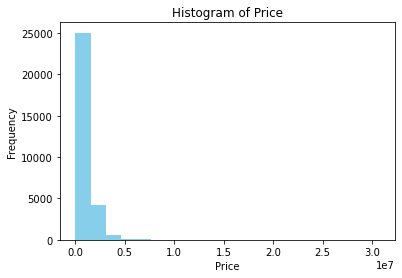

In [58]:
plt.hist(df["price"], bins=20, color="skyblue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

In [59]:
price_summary = df["price"].describe()[["min", "25%", "50%", "75%", "max"]]
print(price_summary)

min       27360.0
25%      649236.0
50%      860000.0
75%     1300000.0
max    30750000.0
Name: price, dtype: float64
